In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


We will be using an E-Commerce Dataset from Kaggle that contains transaction information from around 4,000 customers.

In [4]:
%cd /content/drive/MyDrive/ds
!ls

/content/drive/MyDrive/ds
data.csv


Understanding data

In [63]:
import pandas as pd
df=pd.read_csv('data.csv',encoding='unicode_escape')

In [64]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


The data has following 8 columns/fields

In [65]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

InvoiceNo is unique identifier of each customer invoice.

StockCode is unique identifier of each item in stock.

Description is item purchased by the customer.

Quantity is The number of each item purchased by a customer in a single invoice.

InvoiceDate is The purchase date.
UnitPrice is Price of one unit of each item.

CustomerID is Unique identifier assigned to each user.

Country is from where the purchase was made.

With this transaction data, we try to build different customer segments based on each user’s purchases.🤖

Lets make the data easy to understand.😉

Quantity, InvoiceDate, and UnitPrice are the relevant features in this dataset that provide us with information about client purchasing patterns. 😎

We will use these factors to determine a customer's RFM profile, which stands for Recency, Frequency, and Monetary Value.🤓

RFM is frequently applied in marketing to assess a customer's worth depending on:

📅 Recency: When was the last time they bought something?

🔁Frequency: How frequently have they made purchases?

🤑 Monetary Value: How much do they typically spend on purchases?



📅 Recency

In [66]:
#converting date column to date time format
df['Date']=pd.to_datetime(df['InvoiceDate'])
#keep only the most recent date of purchase
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min')

In [67]:
df_rec = df[df['rank']==1]

if customer A was last seen acquiring an item 2 months ago and customer B did the same 2 days ago, customer B must be assigned a higher recency score.

In [68]:
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

<ipython-input-68-6ccb90a19d8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [69]:
df_rec

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1.0,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1.0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1.0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1.0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,2011-12-09 12:16:00,1.0,373
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1.0,373
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1.0,373
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,2011-12-09 12:16:00,1.0,373


🔁Frequency

how many times has each customer made a purchase on the platform.

In [70]:
freq=df_rec.groupby('CustomerID')['Date'].count()
df_freq=pd.DataFrame(freq).reset_index()
df_freq.columns=['CustomerID','frequency']

In [71]:
rec_freq=df_freq.merge(df_rec,on='CustomerID')

In [72]:
rec_freq

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1.0,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1.0,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1.0,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1.0,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
100805,18287.0,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,36,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1.0,172
100806,18287.0,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,60,5/22/2011 10:39,1.45,United Kingdom,2011-05-22 10:39:00,1.0,172
100807,18287.0,29,554065,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1.0,172
100808,18287.0,29,554065,85040A,S/4 PINK FLOWER CANDLES IN BOWL,12,5/22/2011 10:39,1.65,United Kingdom,2011-05-22 10:39:00,1.0,172


🤑 Monetary Value

We can calculate each user’s monetary value to understand the total amount they have spent on the platform.

In [73]:
rec_freq['total']=rec_freq['Quantity']*df['UnitPrice']
m=rec_freq.groupby('CustomerID')['total'].sum()
m=pd.DataFrame(m).reset_index()
m.columns=['CustomerID','monetary_value']
rfm= m.merge(rec_freq,on='CustomerID')

In [74]:
rfm.head()

,CustomerID,monetary_value,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency,total
0,12346.0,189248.25,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1.0,48,189248.25
1,12347.0,1246.73,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1.0,6,40.68
2,12347.0,1246.73,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1.0,6,11.00
3,12347.0,1246.73,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1.0,6,40.68
4,12347.0,1246.73,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1.0,6,122.04


In [75]:
final_df=rfm[['CustomerID','recency','frequency','monetary_value']]
final_df.head()

,CustomerID,recency,frequency,monetary_value
0,12346.0,48,1,189248.25
1,12347.0,6,31,1246.73
2,12347.0,6,31,1246.73
3,12347.0,6,31,1246.73
4,12347.0,6,31,1246.73


WATCHING OUT FOR OUTLIERS!!🤓🔎

recency:


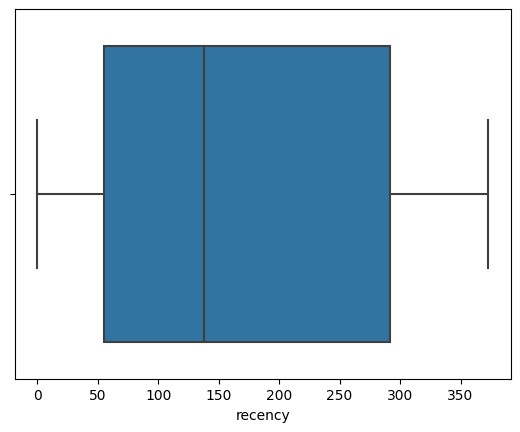

frequency:


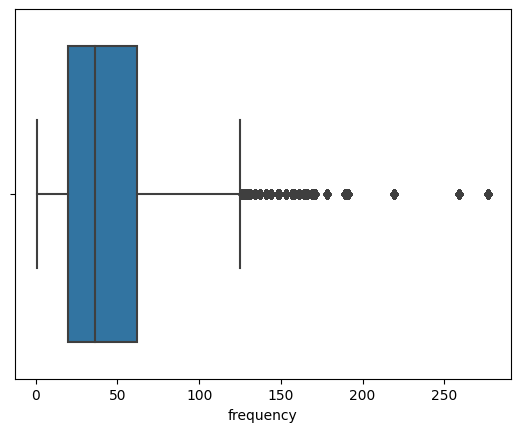

monetary_value:


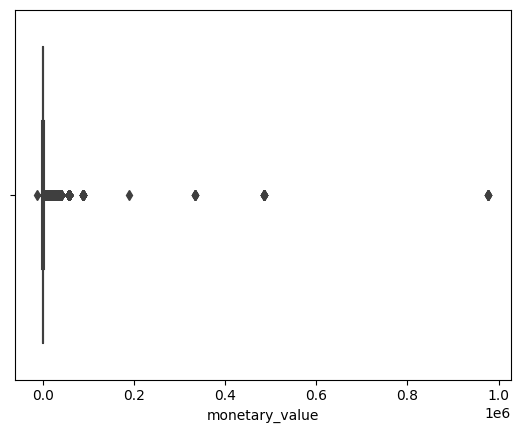

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
list1=['recency','frequency','monetary_value']
for i in list1:
  print(str(i)+":")
  ax=sns.boxplot(x=final_df[str(i)])
  plt.show()

recency:


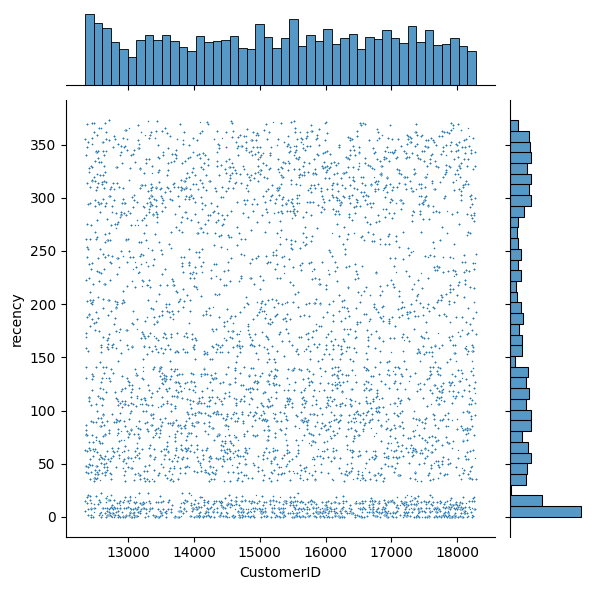

frequency:


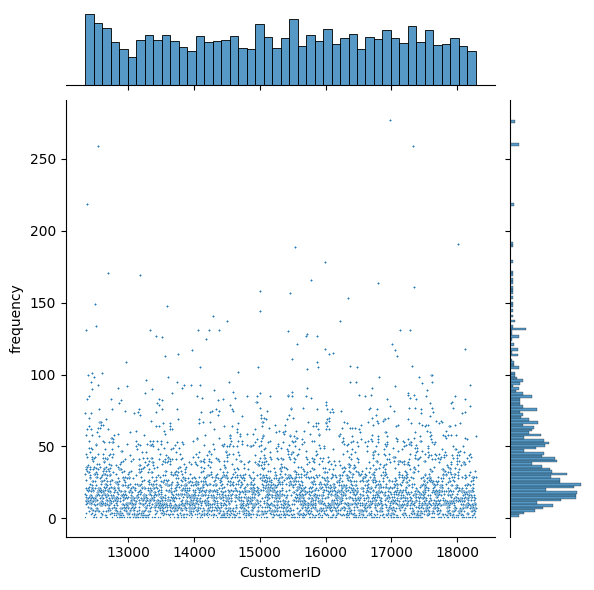

monetary_value:


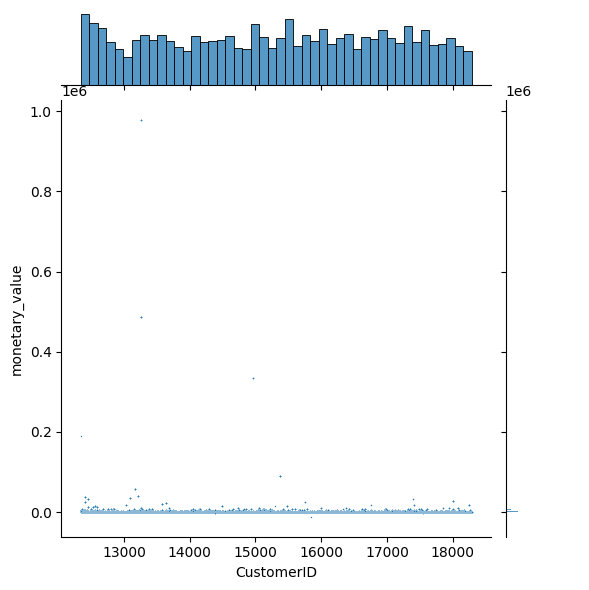

In [81]:

list1=['recency','frequency','monetary_value']
for i in list1:
  print(str(i)+":")
  ax=sns.jointplot(y =str(i), x ='CustomerID', data = final_df, s=1)
  plt.show()

Observe that “recency” is the only variable with no visible outliers.✅ 

“Frequency” and “monetary_value”, on the other hand, have many outliers that must be removed before we proceed to build the model.🤯

To identify outliers, we will compute a measurement called a Z-Score. Z-Scores tell us how far away from the mean a data point is. 

We are going to remove every data point with a Z-Score>=3


In [82]:
from scipy import stats
import numpy as np
#remove customer id column
new_df=final_df[['recency','frequency','monetary_value']]
#remove outliers
z_scores=stats.zscore(new_df)
abs_z_scores=np.abs(z_scores)


In [83]:
abs_z_scores

,recency,frequency,monetary_value
0,0.955294,1.149226,18.606263
1,1.300241,0.402500,0.049886
2,1.300241,0.402500,0.049886
3,1.300241,0.402500,0.049886
4,1.300241,0.402500,0.049886
...,...,...,...
100805,0.063118,0.452282,0.087926
100806,0.063118,0.452282,0.087926
100807,0.063118,0.452282,0.087926
100808,0.063118,0.452282,0.087926


In [84]:
filtered_entries = (abs_z_scores<3).all(axis=1)
new_df=new_df[filtered_entries]

In [85]:
new_df

,recency,frequency,monetary_value
1,6,31,1246.73
2,6,31,1246.73
3,6,31,1246.73
4,6,31,1246.73
5,6,31,1246.73
...,...,...,...
100805,172,29,863.40
100806,172,29,863.40
100807,172,29,863.40
100808,172,29,863.40


recency:


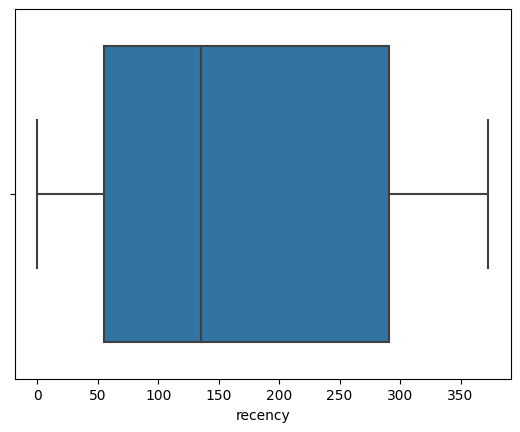

frequency:


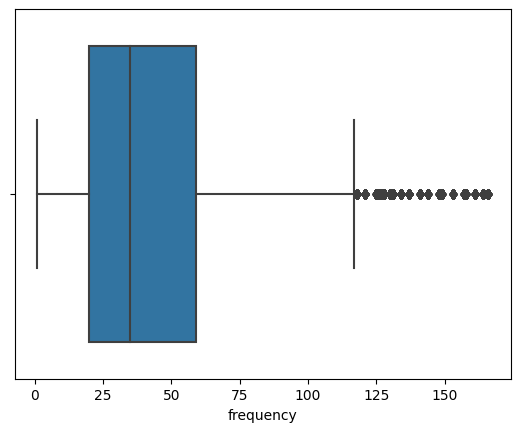

monetary_value:


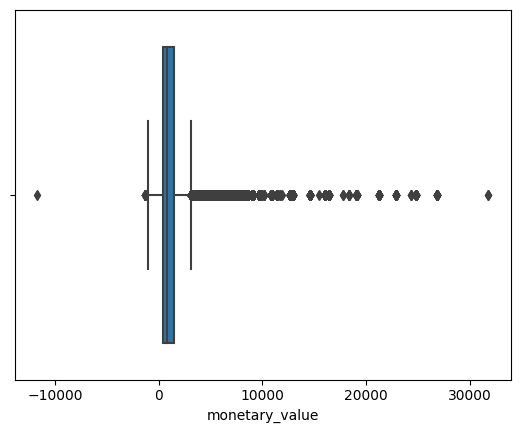

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
list1=['recency','frequency','monetary_value']
for i in list1:
  print(str(i)+":")
  ax=sns.boxplot(x=new_df[str(i)])
  plt.show()

recency:


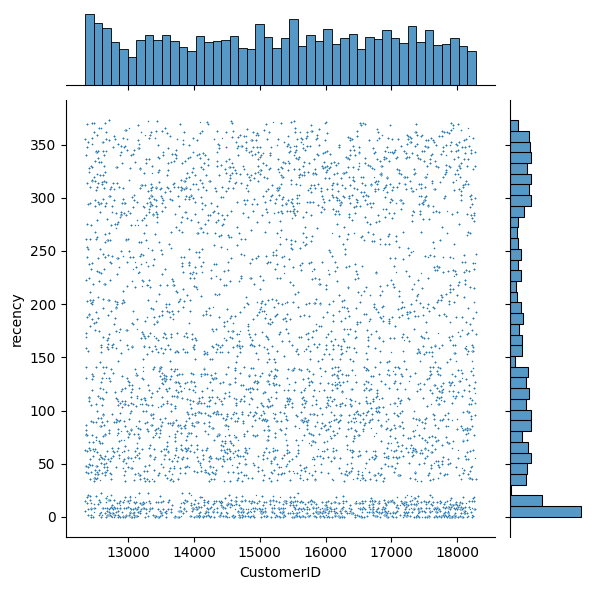

frequency:


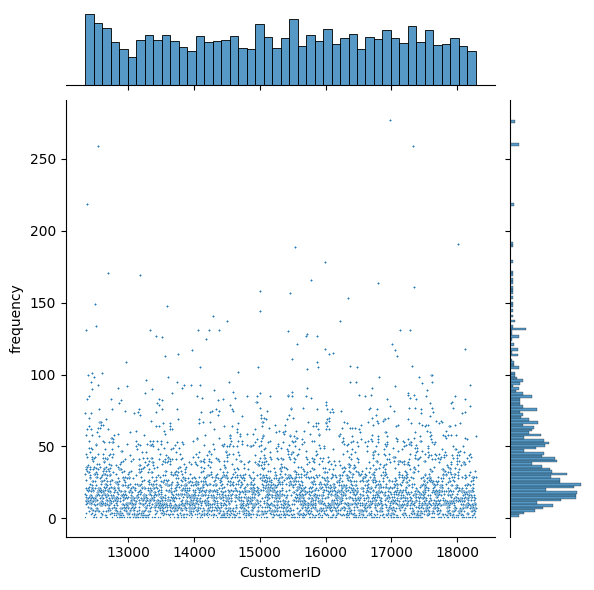

monetary_value:


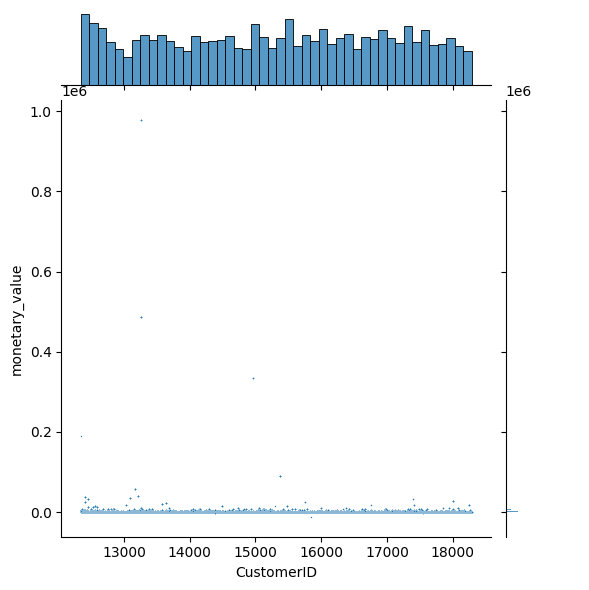

In [87]:

list1=['recency','frequency','monetary_value']
for i in list1:
  print(str(i)+":")
  ax=sns.jointplot(y =str(i), x ='CustomerID', data = final_df, s=1)
  plt.show()

📊We need to scale the dataset’s values so that they follow a normal distribution:

In [88]:
from sklearn.preprocessing import StandardScaler
new_df=new_df.drop_duplicates()
col_names=['recency','frequency','monetary_value']
features=new_df[col_names]
scaler=StandardScaler().fit(features.values)
features=scaler.transform(features.values)
scaled_features=pd.DataFrame(features,columns=col_names)

In [89]:
scaled_features.head()

,recency,frequency,monetary_value
0,-1.196723,0.379971,0.185080
1,-1.120665,-0.259085,1.965919
2,1.752654,2.297138,0.401256
3,-0.715020,-0.259085,-0.217826
4,-0.596706,-0.350378,0.011294


Building Customer Segmentation model
We will make a K-Means clustering algorithm to perform customer segmentation.


We must choose how many segments to divide the data into. The elbow approach, a heuristic, is used to do this.

From 1 to 10 clusters, the K-Means method will be repeated in a loop. The elbow of the curve can then be chosen as the number of clusters to use as we depict model results for this range of values.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

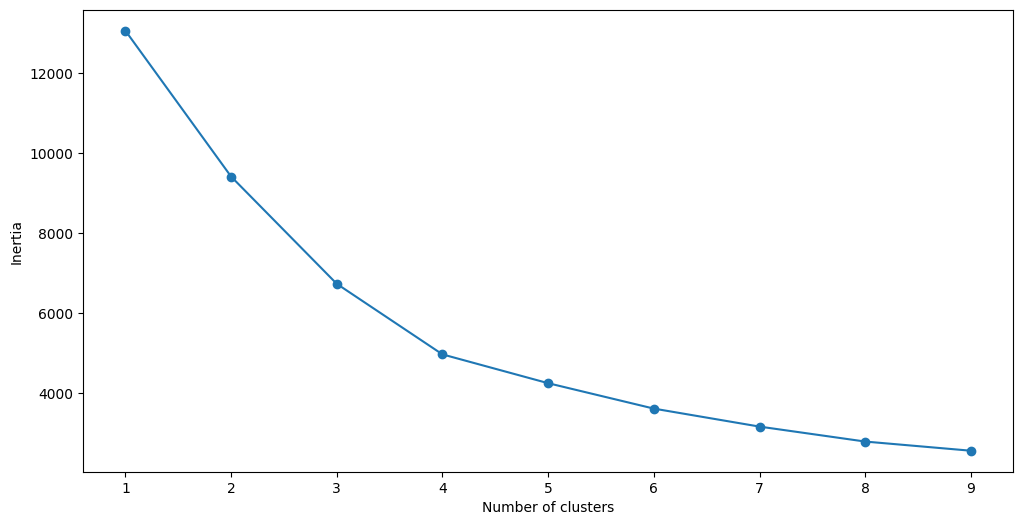

In [90]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

SSE=[]
for cluster in range(1,10):
  kmeans=KMeans(n_clusters=cluster,init='k-means++')
  kmeans.fit(scaled_features)
  SSE.append(kmeans.inertia_)
#converting result to dataframe and plotting them
frame=pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The “elbow” of this graph is the point of inflection on the curve, and in this case is at the 4-cluster mark. 

This means that the optimal number of clusters to use in this K-Means algorithm is 4. Let’s now build the model with 4 clusters:

In [91]:
#building a model with 4 clusters
kmeans=KMeans(n_clusters=4,init='k-means++')
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

We'll use a metric called the silhouette score to assess how well this model performs. This coefficient's value falls between -1 and +1. A better model will have a higher silhouette score.

In [92]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.4360722849503388


After creating our segmentation model, we now need to group the dataset's customers into clusters:

In [93]:
pred=kmeans.predict(scaled_features)
frame=pd.DataFrame(new_df)
frame['cluster']=pred

In [94]:
frame

,recency,frequency,monetary_value,cluster
1,6,31,1246.73,0
32,15,17,4311.90,0
49,355,73,1618.81,1
122,63,17,553.25,0
139,77,15,947.61,0
...,...,...,...,...
100700,96,10,229.79,0
100710,193,7,92.29,3
100717,247,7,159.91,3
100724,36,57,201.54,1


AttributeError: ignored

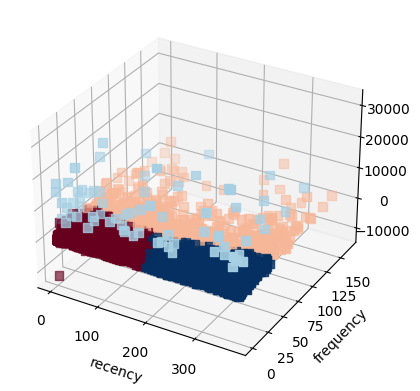

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

df=frame
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['recency'])
y = np.array(df['frequency'])
z = np.array(df['monetary_value'])

ax.scatter(x,y,z, marker="s", c=df["cluster"], s=40, cmap="RdBu")
plt.xlabel('recency')
plt.ylabel('frequency')
plt.zlabel('monetary_value')
plt.show()

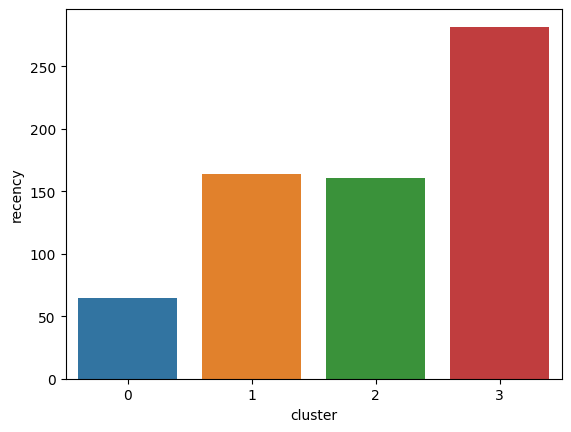

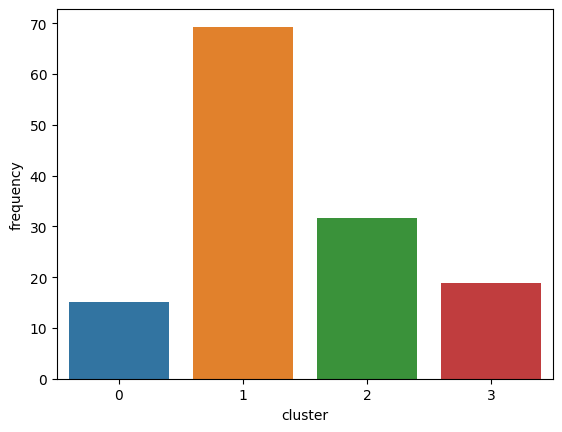

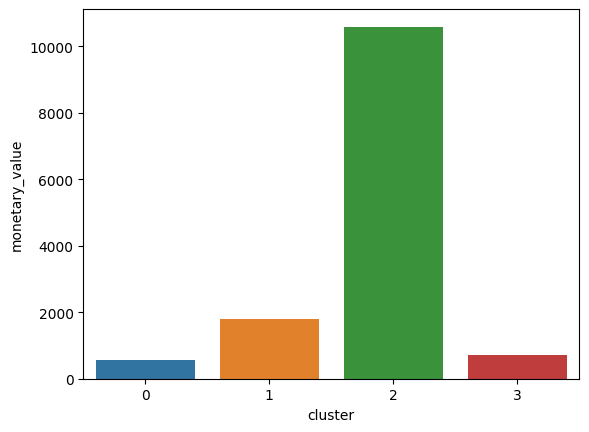

In [99]:
avg_df=frame.groupby(['cluster'],as_index=False).mean()
for i in list1:
  sns.barplot(x='cluster',y=str(i),data=avg_df)
  plt.show()

In [100]:
avg_df

,cluster,recency,frequency,monetary_value
0,0,64.851028,15.084767,569.562405
1,1,163.389796,69.297959,1806.630571
2,2,160.630137,31.602740,10587.056575
3,3,281.600569,18.832978,728.469339


CLUSTER 0:	
Customers in this segment have low recency, frequency, and very low monetary value scores. 

CLUSTER 1:
Customers in this segment have average recency, great frequency, and less monetary value scores. 

CLUSTER 2:
Customers in this segment have very high recency, low frequency, and very less monetary value scores.
 
CLUSTER 3:
Customers in this segment have average recency, average frequency, and high monetary value scores. 